# Deep Learning Using Tensorflow

In this lesson you are going to try to create a model that supases the one you created in Lesson 07 using a ***Deep Learning*** NN. 

> What is deep learning? 

This is just a term to describe neural networks that are composed of more than one hidden layer. The good news is that it is pretty easy to go from one to many hidden layers and your predictions should also improve.

# Let's Get to Work!

In [2]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

In [3]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.3 |Anaconda, Inc.| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Tensorflow version 1.1.0
Pandas version 0.20.3
Numpy version 1.12.1


# Function to Model

    y = a * x ^ 2 + b * x + c

In [4]:
# Let's generate 1000 random samples
pool = np.random.rand(1000,1).astype(np.float32)

# shuffle pool
np.random.shuffle(pool)

# 15% test samples
samples = int(1000 * 0.15)

# 15% test data
test_x = pool[:samples]

# 85% training data
train_x = pool[samples:]

print("test data shape:",str(test_x.shape))
print("train data shape:",str(train_x.shape))

test_y = 2.0*test_x**2 + 3.0*test_x + 5
train_y = 2.0*train_x**2 + 3.0*train_x + 5

test data shape: (150, 1)
train data shape: (850, 1)


In [5]:
df = pd.DataFrame({
    'x':train_x[:,0],
    'y':train_y[:,0]
})
df.head()

,x,y
0,0.257932,5.906856
1,0.279798,5.995969
2,0.384144,6.447567
3,0.158281,5.524947
4,0.773224,8.515423


In [6]:
df.describe()

,x,y
count,850.000000,850.000000
mean,0.487139,7.097677
std,0.284466,1.419820
min,0.002644,5.007945
25%,0.240037,5.835346
50%,0.477331,6.887685
75%,0.728798,8.248686
max,0.997473,9.982327


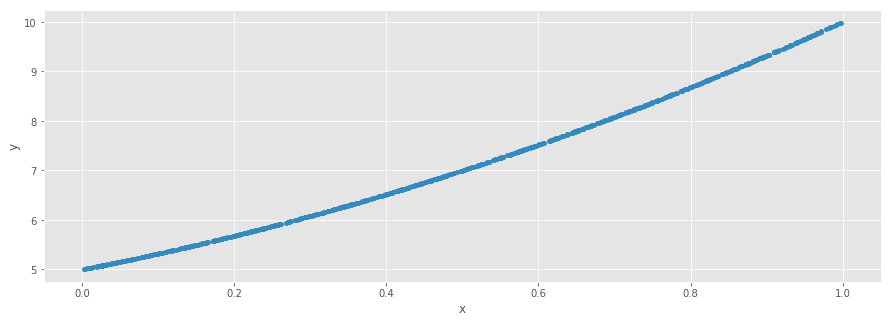

In [7]:
df.plot.scatter(x='x',y='y',figsize=(15,5))

# Helper Functions
Let's make a function to create  layer easily!

In [8]:
def add_layer(inputs,input_size,output_size,activate_function=None):
    # tf.truncated_normal([size of batches,size of output layer])
    Weights = tf.Variable(tf.truncated_normal([input_size,output_size],mean=0.1,stddev=0.1))
    # tf.truncated_normal([size of output layer])
    biases = tf.Variable(tf.truncated_normal([output_size],mean=0.1,stddev=0.1))
    # compute pred
    pred = tf.matmul(inputs,Weights) + biases
    
    output = pred
    if activate_function is not None:
        output = activate_function(pred)
    return output

# Model Your Graph
Start to use W (for weight) and b (for bias) when setting up your variables. Aside from adding your ReLU activation function, it is a good idea to use Tensorflow's ***matrix multiplication function (matmul)*** as shown below.  

> The ? in the shape output just means it can be of any shape.

For the shape parameter, you can think of it like this...  

> shape = [how many data points do you have, how many features does each data point have]  

For this lesson since we are doing a simple regression, we only have one feature (x). We use the ***None*** keyword so that we are not restricted on the number of samples to feed our model. This will become more important when you learn about training using batches on a future lesson.

In [9]:
# number of neurons
hidden_size = 100

# placeholders
# shape= [how many samples do you have, how many input neurons]
x = tf.placeholder(tf.float32,shape=[None,1],name='01_x')
y = tf.placeholder(tf.float32,shape=[None,1],name='01_y')

print('shape of x,y',x.get_shape(),y.get_shape())

shape of x,y (?, 1) (?, 1)


Note that the input of one layer becomes the input of the next layer.

In [10]:
# create your hidden layers
h1 = add_layer(x,1,hidden_size,tf.nn.relu)
h2 = add_layer(h1,hidden_size,hidden_size,tf.nn.relu)

print('shape of h1,h2 ',h1.get_shape(),h2.get_shape())

shape of h1,h2  (?, 100) (?, 100)


In [11]:
# output layer
pred = add_layer(h2,hidden_size,1)

print('shape of output layer:',pred.get_shape())

shape of output layer: (?, 1)


In [12]:
# minimize the square error
loss = tf.reduce_mean(tf.square(pred-y))

# pick out the optimizer
optimizer = tf.train.GradientDescentOptimizer(0.003)
train = optimizer.minimize(loss)

# How Good is Your Model?
Set up the following variables to calculate the accuracy rate of your model. You will do that shortly.

In [13]:
# check correct of model
correct_prediction = tf.equal(tf.round(pred),tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

# Training Time!
The best score I was able to obtain was a ~98% accuracy using a LR of 0.003 and iterating 3,000 times. As you can see adding additional layers made a big difference.

In [27]:
init = tf.global_variables_initializer()

t = []

with tf.Session() as sess:
    sess.run(init)
    
    train_data = {x:train_x,y:train_y}
    test_data = {x:test_x,y:test_y}
    
    for step in range(3000):
        
        train_loss,train_pred = sess.run([loss,train],feed_dict=train_data)
        
        if step % 200 == 0:
            t.append((step,train_loss))
            print('step,loss,accuracy:',step,train_loss,accuracy.eval(train_data))
            
    print('train accuracy:',accuracy.eval(train_data))
    print('test accuracy:',accuracy.eval(test_data))
    
    test_result = sess.run(pred,feed_dict=test_data)
    df_final = pd.DataFrame({
        'test_x':test_x[:,0],
        'pred':test_result[:,0]
    })
    
    df_loss = pd.DataFrame(t,columns=['step','train_loss'])

step,loss,accuracy: 0 51.7463 0.0
step,loss,accuracy: 200 0.00460044 0.944706
step,loss,accuracy: 400 0.00294763 0.961176
step,loss,accuracy: 600 0.00212376 0.972941
step,loss,accuracy: 800 0.00163389 0.974118
step,loss,accuracy: 1000 0.00131238 0.981176
step,loss,accuracy: 1200 0.00108579 0.984706
step,loss,accuracy: 1400 0.000919085 0.989412
step,loss,accuracy: 1600 0.000792847 0.989412
step,loss,accuracy: 1800 0.000694815 0.990588
step,loss,accuracy: 2000 0.000617551 0.990588
step,loss,accuracy: 2200 0.000555666 0.989412
step,loss,accuracy: 2400 0.000505783 0.988235
step,loss,accuracy: 2600 0.000464906 0.988235
step,loss,accuracy: 2800 0.000431111 0.990588
train accuracy: 0.990588
test accuracy: 0.993333


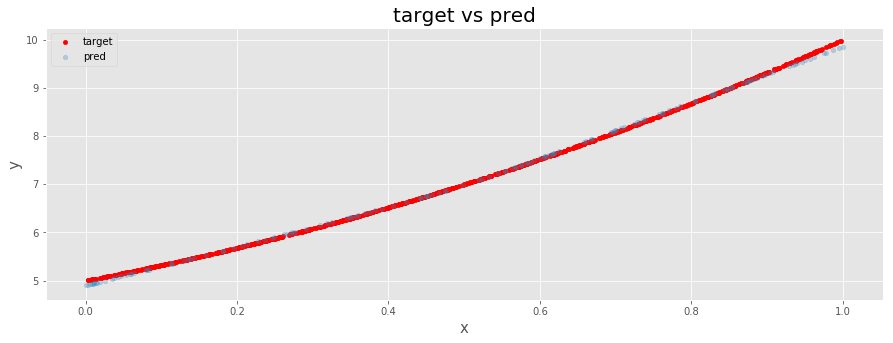

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)
axes.legend(["target", "pred"], loc='best');

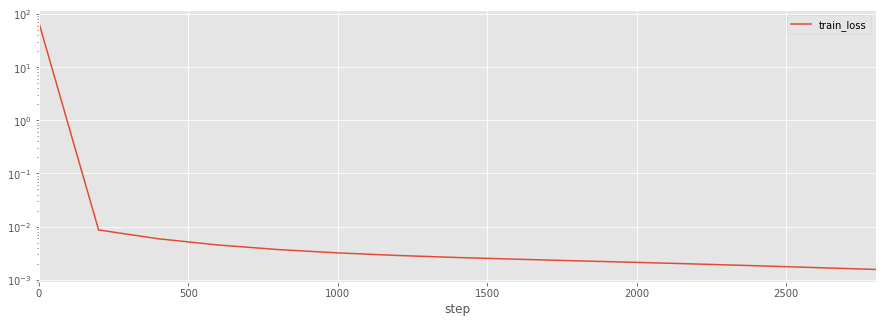

In [16]:
df_loss.set_index('step').plot(logy=True, figsize=(15,5));

# Your Turn  

> Try different sizes of neurons, learning rates, and iterations. You will notice that changing any one of these parameters will require you to change another one. Try to get a feel of this model and how it is affected by tweaking it. If you are bold enough, try to add even more layers and see what happens. In the next lesson we are going to talk about Validation.

In [17]:
def deep_nn(hidden_size = 100,epoch=3000,lr=0.003):

    # placeholders
    # shape= [how many samples do you have, how many input neurons]
    x = tf.placeholder(tf.float32,shape=[None,1],name='01_x')
    y = tf.placeholder(tf.float32,shape=[None,1],name='01_y')

    # create your hidden layers
    h1 = add_layer(x,1,hidden_size,tf.nn.relu)
    h2 = add_layer(h1,hidden_size,hidden_size,tf.nn.relu)

    pred = add_layer(h2,hidden_size,1)

    # minimize the square error
    loss = tf.reduce_mean(tf.square(pred-y))

    # pick out the optimizer
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train = optimizer.minimize(loss)

    # check correct of model
    correct_prediction = tf.equal(tf.round(pred),tf.round(y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

    init = tf.global_variables_initializer()

    t = []

    with tf.Session() as sess:
        sess.run(init)

        train_data = {x:train_x,y:train_y}
        test_data = {x:test_x,y:test_y}

        for step in range(epoch):

            train_loss,train_pred = sess.run([loss,train],feed_dict=train_data)

            if step % 200 == 0:
                t.append((step,train_loss))
                print('step,loss,accuracy:',step,train_loss,accuracy.eval(train_data))

        print('train accuracy:',accuracy.eval(train_data))
        print('test accuracy:',accuracy.eval(test_data))

        test_result = sess.run(pred,feed_dict=test_data)
        df_final = pd.DataFrame({
            'test_x':test_x[:,0],
            'pred':test_result[:,0]
        })

        df_loss = pd.DataFrame(t,columns=['step','train_loss'])

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

    # Chart 1 - Shows the line we are trying to model
    df.plot.scatter(x='x', y='y', ax=axes, color='red')

    # Chart 2 - Shows the line our trained model came up with
    df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

    # add a little sugar
    axes.set_title('target vs pred', fontsize=20)
    axes.set_ylabel('y', fontsize=15)
    axes.set_xlabel('x', fontsize=15)
    axes.legend(["target", "pred"], loc='best');

    df_loss.set_index('step').plot(logy=True, figsize=(15,5));

step,loss,accuracy: 0 419.341 0.0
step,loss,accuracy: 200 0.00200622 0.970588
step,loss,accuracy: 400 0.00116112 0.98
step,loss,accuracy: 600 0.000765325 0.984706
step,loss,accuracy: 800 0.000563554 0.984706
step,loss,accuracy: 1000 0.000457464 0.990588
step,loss,accuracy: 1200 0.000398042 0.994118
step,loss,accuracy: 1400 0.000362191 0.994118
step,loss,accuracy: 1600 0.000338744 0.994118
step,loss,accuracy: 1800 0.000321731 0.992941
step,loss,accuracy: 2000 0.000308319 0.991765
step,loss,accuracy: 2200 0.000297066 0.991765
step,loss,accuracy: 2400 0.000287212 0.989412
step,loss,accuracy: 2600 0.000278322 0.989412
step,loss,accuracy: 2800 0.00027013 0.989412
train accuracy: 0.989412
test accuracy: 0.993333


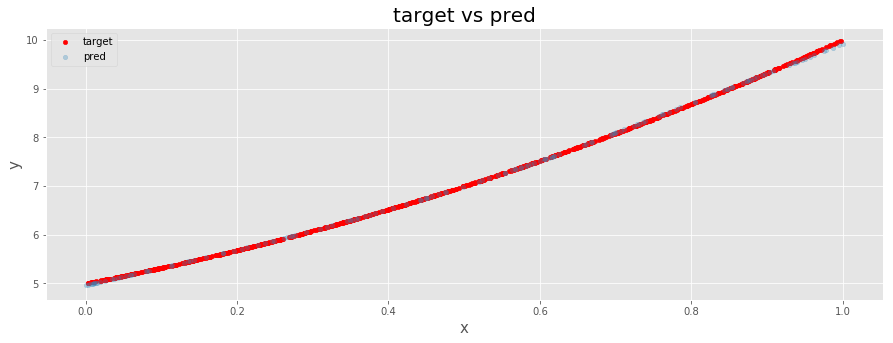

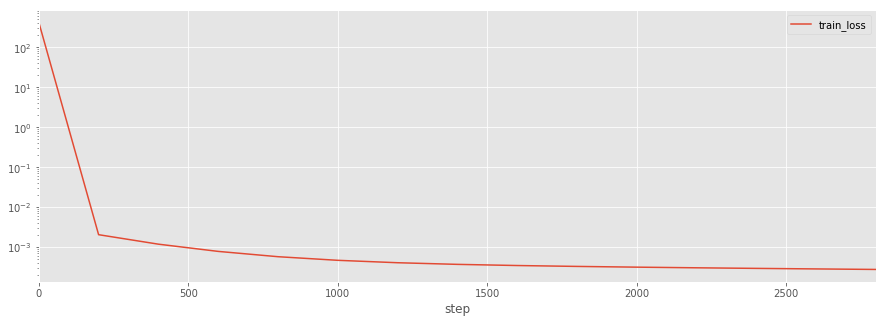

In [32]:
deep_nn(hidden_size = 120,epoch=3000,lr=0.0015)